In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import statistics
from collections import Counter
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings("ignore")

In [19]:
# Load the "drug.csv" dataset
data = pd.read_csv("./dataset2.csv")
# Print information about the old dataset
print(data.head())

  Unnamed: 0    P1    P2    P3    P4    P5
0         P1  0.00  0.10  0.41  0.55  0.35
1         P2  0.10  0.00  0.64  0.47  0.98
2         P3  0.41  0.64  0.00  0.44  0.85
3         P4  0.55  0.47  0.44  0.00  0.76
4         P5  0.35  0.98  0.85  0.76  0.00


In [20]:
# Hirarchical Clustering Model
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [21]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [22]:
finalData = data[['P1', 'P2', 'P3', 'P4', 'P5']]
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage= 'single')
model.fit(finalData)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

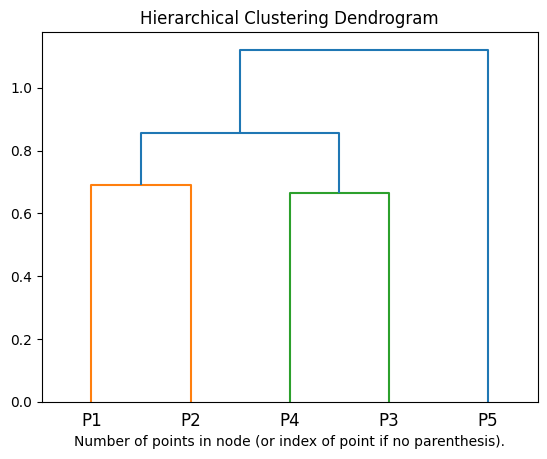

In [23]:
plt.title("Hierarchical Clustering Dendrogram")
label_list = ["P1", "P2", "P3", "P4", "P5"]
plot_dendrogram(model, truncate_mode="level", p=4, labels = label_list)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()